# Time Series with LSTM in Machine Learning  

## Project Goal  
In this project, we aim to use past time series data to predict future values with **LSTM**. This helps support forward-looking decisions in areas such as production, finance, and demand planning.  

## Time Series  
Time series is a set of data recorded in sequence over time (e.g., daily temperature, monthly sales).  
👉 Simply: **A method of predicting the future by looking at the past.**  

## LSTM  
LSTM (Long Short-Term Memory) is a special type of neural network that can remember long-term dependencies.  
👉 Simply: **A model that predicts the future without forgetting past information.**  


[Time Series with LSTM in Machine Learning](https://amanxai.com/2020/08/29/time-series-with-lstm-in-machine-learning/)

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
# Sonuçların tekrarlanabilir olması için rastgele tohum (seed) sabitleniyor.”
# Yani, aynı kodu tekrar çalıştırdığında her seferinde farklı sonuçlar almak yerine aynı sonuçları elde edersin.

In [34]:
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
# usecols=[1]   → CSV dosyasındaki sadece 2. sütunu (index=1) oku
# engine='python' → Dosyayı okurken Python motorunu kullan (daha esnek ama biraz daha yavaş)

In [35]:
dataset = dataframe.values

In [36]:
dataset = dataset.astype('float32')

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [38]:
dataset = scaler.fit_transform(dataset)

In [39]:
train_size = int(len(dataset) * 0.67) # Verinin %67'sini eğitim için ayır
test_size = len(dataset) - train_size  # Kalan %33'ü test için ayır

In [40]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 
# # Veriyi train ve test olarak ikiye böl

In [41]:
print(len(train), len(test)) # Eğitim ve test setleri sayısı 

96 48


## Time Series with LSTM

In [42]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []                     # Boş X (girdiler) ve y (çıktılar) listeleri
    for i in range(len(dataset) - look_back - 1):   # Her adımda bir pencere kaydır
        a = dataset[i:(i + look_back), 0]     # i..i+look_back-1 arasındaki değerler → X
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])# Pencerenin hemen sonrası tek değer → y (hedef)
    return numpy.array(dataX), numpy.array(dataY)   # Listeleri numpy dizisine çevir

In [43]:
# reshape into X=t and Y=t+1
look_back = 1                     # Kaç geçmiş adımı girdi olarak kullanacağız (pencere boyu)

trainX, trainY = create_dataset(train, look_back)  # Train verisinden (X, y) çiftleri üret
testX, testY   = create_dataset(test,  look_back)  # Test verisinden (X, y) çiftleri üret

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# LSTM giriş şekli: (örnek_sayısı, zaman_adımı, özellik_sayısı)
# burada: zaman_adımı=1 (look_back tek boyut olarak üçüncü eksene taşınıyor), özellik_sayısı=look_back

testX  = numpy.reshape(testX,  (testX.shape[0],  1, testX.shape[1]))
# test verisi için de aynı 3D şekle dönüştürme (samples, timesteps=1, features=look_back)

In [44]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 1s - 12ms/step - loss: 0.0366
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0171
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0129
Epoch 4/100
94/94 - 0s - 1ms/step - loss: 0.0118
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0110
Epoch 6/100
94/94 - 0s - 1ms/step - loss: 0.0100
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0090
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0082
Epoch 9/100
94/94 - 0s - 1ms/step - loss: 0.0073
Epoch 10/100
94/94 - 0s - 1ms/step - loss: 0.0063
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0056
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0048
Epoch 13/100
94/94 - 0s - 1ms/step - loss: 0.0041
Epoch 14/100
94/94 - 0s - 1ms/step - loss: 0.0035
Epoch 15/100
94/94 - 0s - 1ms/step - loss: 0.0032
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0028
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0025
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0024
Epoch 19/100
94/94 - 0s - 1ms/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 1ms/step - loss: 0.0022
Epoch 21/100
94/94 -

In [45]:
trainPredict = model.predict(trainX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step 


In [46]:
testPredict = model.predict(testX)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [47]:
# invert predictions

In [48]:
trainPredict = scaler.inverse_transform(trainPredict) # Modelin train için ürettiği tahminleri 0–1 aralığından gerçek skalasına döndürür.

In [49]:
trainY = scaler.inverse_transform([trainY])  # Train’in gerçek hedef değerlerini (y) orijinal skala’ya çevirir.

In [50]:
testPredict = scaler.inverse_transform(testPredict)

In [51]:
testY = scaler.inverse_transform([testY])

In [52]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

In [53]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [54]:
# plot için tahmin -  train 
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [55]:
#  plot için tahmin -  test 
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

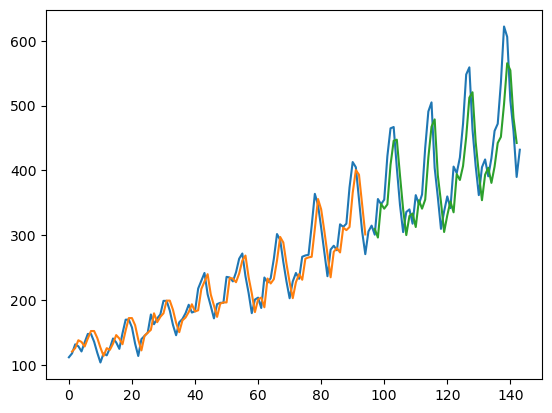

In [56]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Conclusion
The LSTM captured trend and seasonality well to forecast future values; accuracy can improve further with a larger look_back and tuned hyperparameters.